In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-30.286333765252067 147.92118849116287
-58.97934131545865 -12.259414215149462
-25.89041469826016 66.52183671726385
-39.391374914155946 81.44436259187137
49.11347093015834 91.2419038225458
-10.204295773047576 -29.280683169324135
-32.83821943693716 9.337951213380933
-82.53891839775056 -6.456686547888182
58.179925850478725 53.21775251193523
-71.20194067242207 52.624928287560635
52.03019835179751 -56.73699730279361
9.558828592204037 40.27502306596364
-5.010083974334876 -139.9267273299821
40.82417952249983 82.214344544445
-77.4249596623644 -119.92692834908925
-3.5248165774885507 169.47802839306513
-60.42520015540306 -58.03358263095889
-79.73737767163311 -55.07905850728014
-33.02106637416898 77.1329774469516
65.3596380008245 -146.11787189910098
43.06621413420709 -110.99913759874384
29.2631482309438 -43.936609279828104
84.39134347197572 -179.5988500384215
-8.062426197332158 -83.15753612720992
7.072018349285472 -93.34706864402281
-41.97945257408962 -58.84792548238343
5.58622135891099 -20.90175

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

1466

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narrabri
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | ulaangom
Processing Record 5 of Set 1 | olinda
Processing Record 6 of Set 1 | oranjemund
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | balezino
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | abomsa
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | kuche
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | jackson
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of 

Processing Record 34 of Set 4 | butterworth
Processing Record 35 of Set 4 | ballina
Processing Record 36 of Set 4 | cherskiy
Processing Record 37 of Set 4 | harer
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | esil
Processing Record 40 of Set 4 | dzhida
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | lexington
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | weligama
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | vredendal
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | tomatlan
Processing Record 1 of Set 5 | det udom
Processing Record 2 of Set 5 | garden city
Processing Record 3 of Set 5 | ajdabiya
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | karasjok
Processing Record 6 of Set 5 | bolshoye soldatskoye
City not found. Skipping...
Processing Record 7 of Se

Processing Record 25 of Set 8 | lakselv
Processing Record 26 of Set 8 | nouadhibou
Processing Record 27 of Set 8 | araouane
Processing Record 28 of Set 8 | khandyga
Processing Record 29 of Set 8 | antalaha
Processing Record 30 of Set 8 | mehamn
Processing Record 31 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 32 of Set 8 | boulder city
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | bangkal
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 37 of Set 8 | maceio
Processing Record 38 of Set 8 | santa cruz
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | les cayes
Processing Record 41 of Set 8 | felanitx
Processing Record 42 of Set 8 | sioux lookout
Processing Record 43 of Set 8 | obuasi
Processing Record 44 of Set 8 | clifton
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | kontagora
Processing Record 4

Processing Record 9 of Set 12 | luwuk
Processing Record 10 of Set 12 | severo-yeniseyskiy
Processing Record 11 of Set 12 | warqla
City not found. Skipping...
Processing Record 12 of Set 12 | kambove
Processing Record 13 of Set 12 | inuvik
Processing Record 14 of Set 12 | kidal
Processing Record 15 of Set 12 | halalo
City not found. Skipping...
Processing Record 16 of Set 12 | mirnyy
Processing Record 17 of Set 12 | sikeston
Processing Record 18 of Set 12 | fougamou
Processing Record 19 of Set 12 | kudahuvadhoo
Processing Record 20 of Set 12 | luganville
Processing Record 21 of Set 12 | thunder bay
Processing Record 22 of Set 12 | upata
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | shreveport
Processing Record 25 of Set 12 | alyangula
Processing Record 26 of Set 12 | randudongkal
Processing Record 27 of Set 12 | beyneu
Processing Record 28 of Set 12 | kamenka
Processing Record 29 of Set 12 | marsh harbour
Processing Record 30 of Set 12 | grindavik
Processing Re

Processing Record 43 of Set 15 | kenai
Processing Record 44 of Set 15 | nicoya
Processing Record 45 of Set 15 | mahibadhoo
Processing Record 46 of Set 15 | novikovo
Processing Record 47 of Set 15 | cookshire
City not found. Skipping...
Processing Record 48 of Set 15 | kushiro
Processing Record 49 of Set 15 | coalinga
Processing Record 50 of Set 15 | yelizovo
Processing Record 1 of Set 16 | qui nhon
Processing Record 2 of Set 16 | la paz
Processing Record 3 of Set 16 | ilebo
Processing Record 4 of Set 16 | kattivakkam
Processing Record 5 of Set 16 | falealupo
City not found. Skipping...
Processing Record 6 of Set 16 | ulaanbaatar
Processing Record 7 of Set 16 | montivilliers
Processing Record 8 of Set 16 | matagami
Processing Record 9 of Set 16 | san juan
Processing Record 10 of Set 16 | acajutla
Processing Record 11 of Set 16 | egvekinot
Processing Record 12 of Set 16 | conceicao do araguaia
Processing Record 13 of Set 16 | saint-leu
Processing Record 14 of Set 16 | marshall
Processing

Processing Record 31 of Set 19 | ca mau
Processing Record 32 of Set 19 | skagen
Processing Record 33 of Set 19 | kostomuksha
Processing Record 34 of Set 19 | makokou
Processing Record 35 of Set 19 | santa barbara
Processing Record 36 of Set 19 | redwater
Processing Record 37 of Set 19 | ust-kuyga
Processing Record 38 of Set 19 | miyoshi
Processing Record 39 of Set 19 | santa marta
Processing Record 40 of Set 19 | umm bab
Processing Record 41 of Set 19 | valley station
Processing Record 42 of Set 19 | port lincoln
Processing Record 43 of Set 19 | senanga
Processing Record 44 of Set 19 | nautla
Processing Record 45 of Set 19 | cumaribo
City not found. Skipping...
Processing Record 46 of Set 19 | nkoteng
Processing Record 47 of Set 19 | gabi
Processing Record 48 of Set 19 | langenhagen
Processing Record 49 of Set 19 | iguape
Processing Record 50 of Set 19 | mosetse
Processing Record 1 of Set 20 | shaunavon
Processing Record 2 of Set 20 | portland
Processing Record 3 of Set 20 | lac du bon

City not found. Skipping...
Processing Record 15 of Set 23 | qurayyat
City not found. Skipping...
Processing Record 16 of Set 23 | banfora
City not found. Skipping...
Processing Record 17 of Set 23 | yulin
City not found. Skipping...
Processing Record 18 of Set 23 | ushtobe
City not found. Skipping...
Processing Record 19 of Set 23 | kirakira
City not found. Skipping...
Processing Record 20 of Set 23 | mayumba
City not found. Skipping...
Processing Record 21 of Set 23 | junnar
City not found. Skipping...
Processing Record 22 of Set 23 | berezovyy
City not found. Skipping...
Processing Record 23 of Set 23 | tambopata
City not found. Skipping...
Processing Record 24 of Set 23 | panaba
City not found. Skipping...
Processing Record 25 of Set 23 | goderich
City not found. Skipping...
Processing Record 26 of Set 23 | lichinga
City not found. Skipping...
Processing Record 27 of Set 23 | siilinjarvi
City not found. Skipping...
Processing Record 28 of Set 23 | taksimo
City not found. Skipping..

City not found. Skipping...
Processing Record 33 of Set 25 | jamsa
City not found. Skipping...
Processing Record 34 of Set 25 | baghdad
City not found. Skipping...
Processing Record 35 of Set 25 | paka
City not found. Skipping...
Processing Record 36 of Set 25 | umm durman
City not found. Skipping...
Processing Record 37 of Set 25 | road town
City not found. Skipping...
Processing Record 38 of Set 25 | kondopoga
City not found. Skipping...
Processing Record 39 of Set 25 | pemba
City not found. Skipping...
Processing Record 40 of Set 25 | cabra
City not found. Skipping...
Processing Record 41 of Set 25 | bilma
City not found. Skipping...
Processing Record 42 of Set 25 | quang ngai
City not found. Skipping...
Processing Record 43 of Set 25 | napier
City not found. Skipping...
Processing Record 44 of Set 25 | zeya
City not found. Skipping...
Processing Record 45 of Set 25 | morehead
City not found. Skipping...
Processing Record 46 of Set 25 | krasnoarmeysk
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 1 of Set 28 | chimore
City not found. Skipping...
Processing Record 2 of Set 28 | tusnad
City not found. Skipping...
Processing Record 3 of Set 28 | capinopolis
City not found. Skipping...
Processing Record 4 of Set 28 | puerto leguizamo
City not found. Skipping...
Processing Record 5 of Set 28 | stayner
City not found. Skipping...
Processing Record 6 of Set 28 | beitbridge
City not found. Skipping...
Processing Record 7 of Set 28 | trondheim
City not found. Skipping...
Processing Record 8 of Set 28 | marawi
City not found. Skipping...
Processing Record 9 of Set 28 | barrancas
City not found. Skipping...
Processing Record 10 of Set 28 | forecariah
City not found. Skipping...
Processing Record 11 of Set 28 | blairmore
City not found. Skipping...
Processing Record 12 of Set 28 | traralgon
City not found. Skipping...
Processing Record 13 of Set 28 | strezhevoy
City not found. Skipping...
Processing Record 14 of Set 28 | mongomo
City not found.

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
len(city_data)

1012

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narrabri,-30.3167,149.7833,74.52,57,80,3.00,AU,2022-11-15 02:40:04
1,Cape Town,-33.9258,18.4232,61.12,81,0,4.16,ZA,2022-11-15 02:40:04
2,Bambous Virieux,-20.3428,57.7575,71.85,60,75,9.22,MU,2022-11-15 02:40:05
3,Ulaangom,49.9811,92.0667,19.00,89,96,0.69,MN,2022-11-15 02:40:05
4,Olinda,-8.0089,-34.8553,80.33,69,40,5.75,BR,2022-11-15 02:35:27
5,Oranjemund,-28.5500,16.4333,58.24,93,25,1.54,NA,2022-11-15 02:36:42
6,Hermanus,-34.4187,19.2345,61.81,84,0,12.33,ZA,2022-11-15 02:40:06
7,Balezino,57.9796,53.0106,17.46,79,100,12.08,RU,2022-11-15 02:40:06
8,East London,-33.0153,27.9116,64.22,80,95,19.26,ZA,2022-11-15 02:40:06
9,Saint Anthony,45.0205,-93.2180,30.65,90,100,8.05,US,2022-11-15 02:40:07


In [16]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narrabri,AU,2022-11-15 02:40:04,-30.3167,149.7833,74.52,57,80,3.00
1,Cape Town,ZA,2022-11-15 02:40:04,-33.9258,18.4232,61.12,81,0,4.16
2,Bambous Virieux,MU,2022-11-15 02:40:05,-20.3428,57.7575,71.85,60,75,9.22
3,Ulaangom,MN,2022-11-15 02:40:05,49.9811,92.0667,19.00,89,96,0.69
4,Olinda,BR,2022-11-15 02:35:27,-8.0089,-34.8553,80.33,69,40,5.75
...,...,...,...,...,...,...,...,...,...
1007,Cardston,CA,2022-11-15 03:07:01,49.2000,-113.3019,25.16,89,99,4.50
1008,Boffa,GN,2022-11-15 03:07:02,10.1667,-14.0333,72.50,84,99,2.64
1009,Otane,NZ,2022-11-15 03:07:02,-39.8833,176.6333,65.01,54,0,7.47
1010,Coolum Beach,AU,2022-11-15 03:07:03,-26.5333,153.1000,90.34,47,86,8.16


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

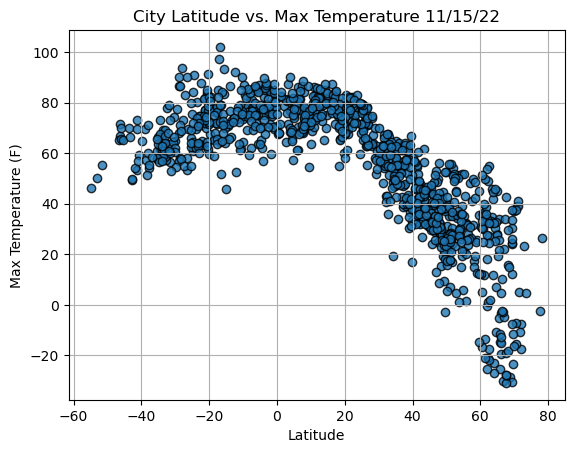

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

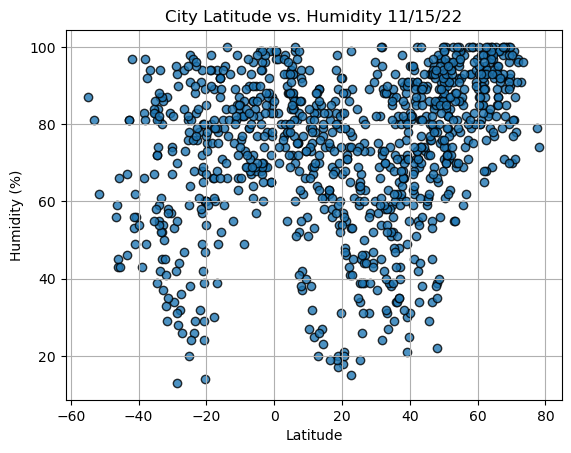

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

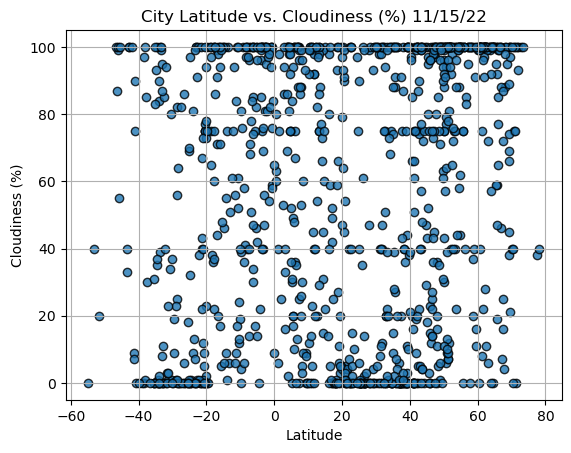

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

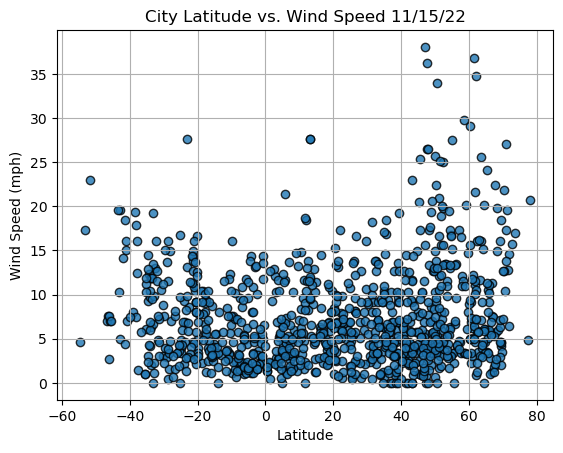

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-11-15 02:40:08
Lat                         -54.8
Lng                         -68.3
Max Temp                    46.06
Humidity                       87
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       False
1       False
2       False
3        True
4       False
        ...  
1007     True
1008     True
1009    False
1010    False
1011    False
Name: Lat, Length: 1012, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ulaangom,MN,2022-11-15 02:40:05,49.9811,92.0667,19.00,89,96,0.69
7,Balezino,RU,2022-11-15 02:40:06,57.9796,53.0106,17.46,79,100,12.08
9,Saint Anthony,US,2022-11-15 02:40:07,45.0205,-93.2180,30.65,90,100,8.05
10,Abomsa,ET,2022-11-15 02:40:07,9.9833,39.9833,63.66,51,0,7.07
14,Fairbanks,US,2022-11-15 02:35:17,64.8378,-147.7164,28.09,92,100,4.61
...,...,...,...,...,...,...,...,...,...
1004,Moose Factory,CA,2022-11-15 03:07:01,51.2585,-80.6094,20.84,95,100,8.43
1005,Massakory,TD,2022-11-15 03:07:01,12.9960,15.7293,74.82,20,97,11.50
1006,Athens,GR,2022-11-15 03:05:12,37.9795,23.7162,57.33,82,1,1.99
1007,Cardston,CA,2022-11-15 03:07:01,49.2000,-113.3019,25.16,89,99,4.50


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ulaangom,MN,2022-11-15 02:40:05,49.9811,92.0667,19.00,89,96,0.69
7,Balezino,RU,2022-11-15 02:40:06,57.9796,53.0106,17.46,79,100,12.08
9,Saint Anthony,US,2022-11-15 02:40:07,45.0205,-93.2180,30.65,90,100,8.05
10,Abomsa,ET,2022-11-15 02:40:07,9.9833,39.9833,63.66,51,0,7.07
14,Fairbanks,US,2022-11-15 02:35:17,64.8378,-147.7164,28.09,92,100,4.61


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

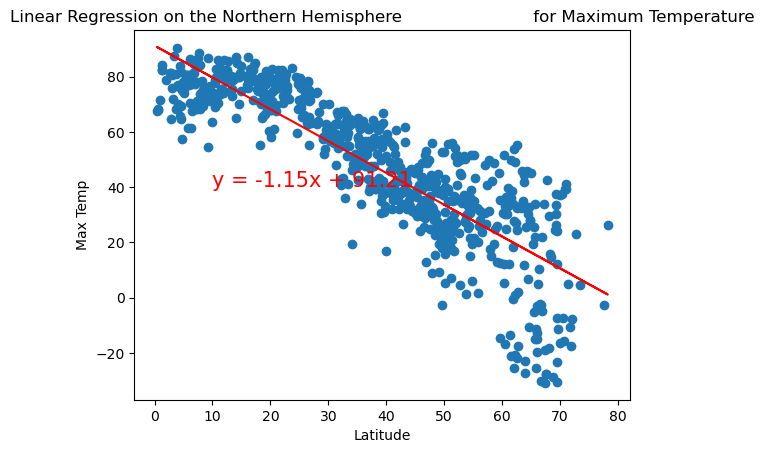

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

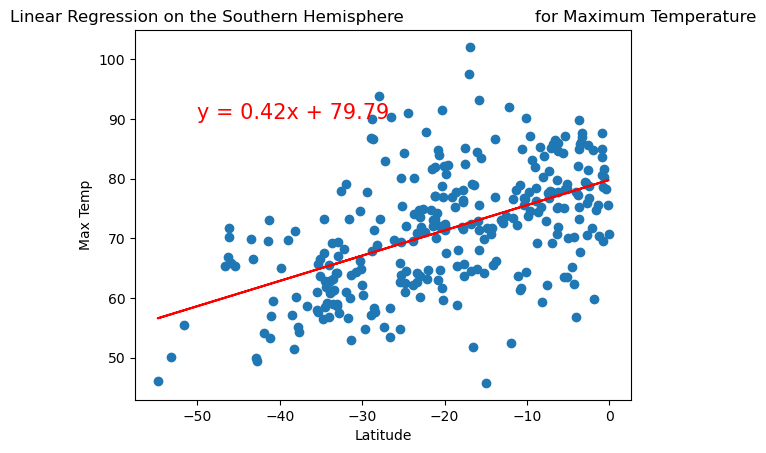

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

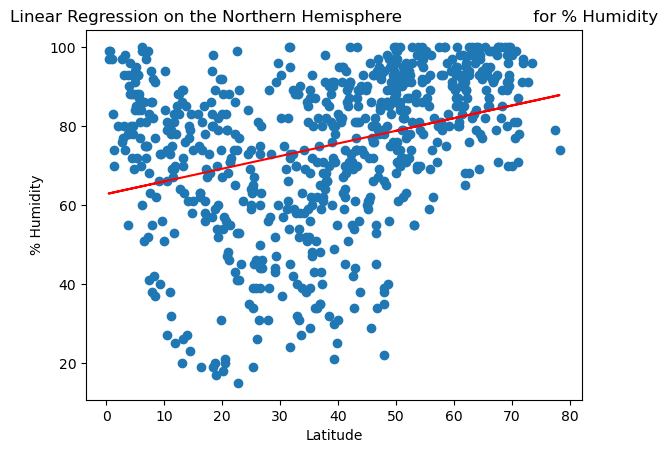

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

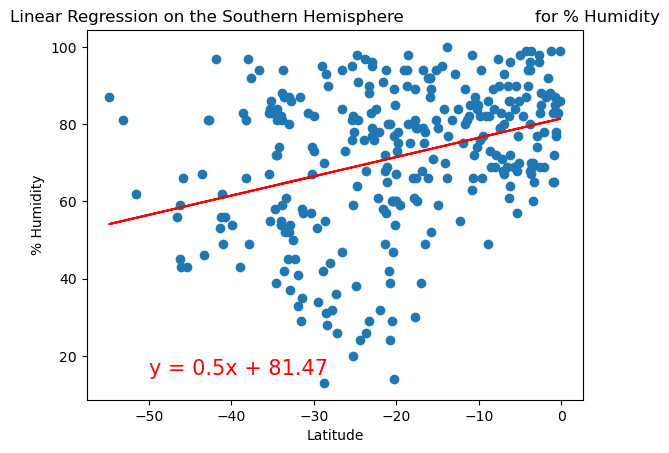

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

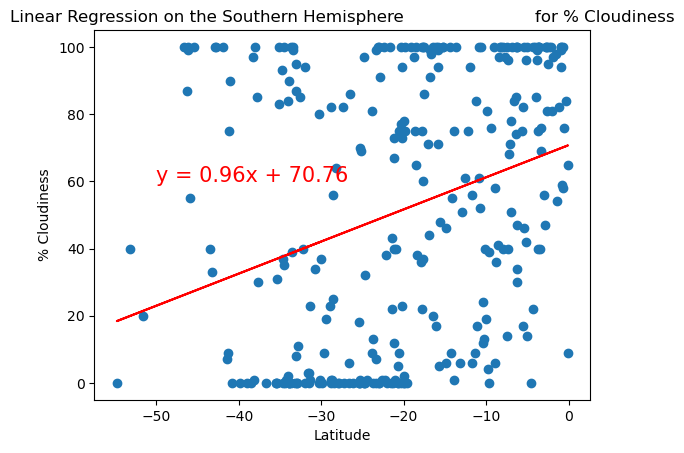

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

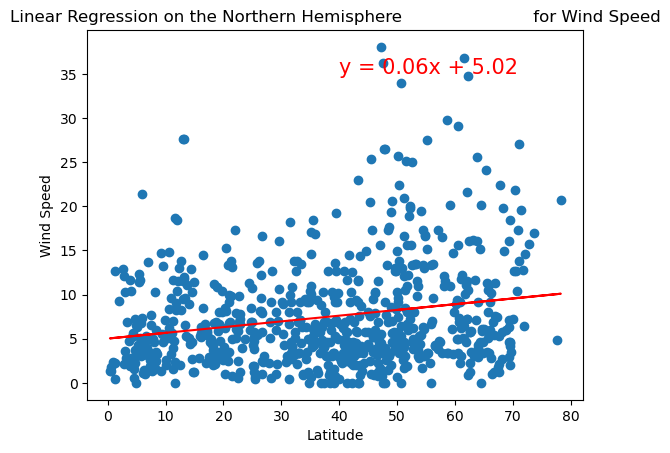

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

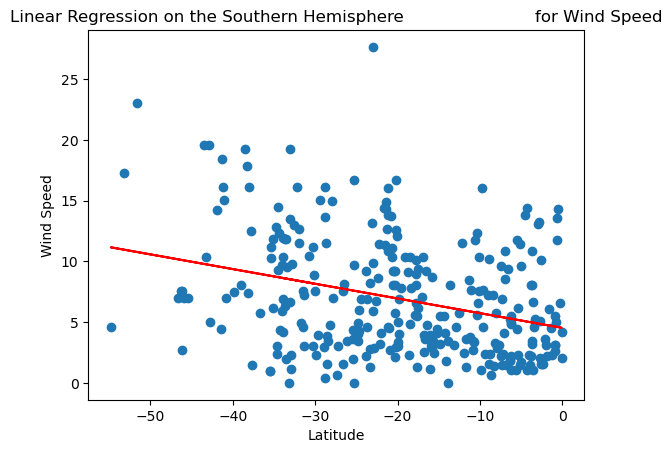

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))